<a href="https://colab.research.google.com/github/Felipanjos/a3_ia_2022.2/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [382]:
# https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data

### Análise e Entendimento do Problema:

#### Especificação do objetivo geral e dos objetivos específicos

O Objetivo geral do projeto é identificar a relação entre a quantidade dos transistors presentes nos processadores e qual a influência que o tamanho, TDP, entre outras características tem sob o processamento. Dentre os objetivos específicos está o tratamento das informações removendo os outliers, padronizando os dados, analisando as alterações, entre outros.

### a. Especificação do tipo de problema: Quanto à Supervisão, Quanto à Tarefa, Quanto ao Modo;

À FAZER 


b. Especificação das Medidas de Desempenho (para Classificação ou Regressão)


Como metódos de desempenho, os principais utilizados no nosso projeto, se tratam de acurácia para a Classicação e erro quadrático médio para Regressão, esses metódos, são extremamente importantes, pois é através deles que é possível observar o quão precisas estão sendo as predições realizadas pela máquina, por serem duas formas diferentes de Aprendizado de máquina supervisionado, cada um possui seu próprio método de desempenho, para a classificação usaremos o principal citado anteriormente, acurácia, se trata de um indicador da performance geral do modelo, contando quantas classificações foram feitas corretamente, para ser calculado, se torna necessário utilizar a Matriz de confusão, identificando os verdadeiros positivos, falso negativos, falso positivos e verdadeiros negativos, através desses dados é possível montar a Matriz e utilizar a formúla VP+VN/VP+VN+FP+FN para assim medir a acurácia do modelo, já para a regressão utilizaremos o erro quadrático médio, esse método carrega como objetivo encontrar a diferença dos valores iniciais com os valores preditos, quanto mais alta a diferença, maior o problema do modelo, pois os valores encontrados não estão sendo precisos, essa média é calculada através da diferença do valor predito para o valor real, o resultado é elevado ao quadrado, fazendo isso para todos os pontos, como já dito, quanto maior o resultado, mais pobre estão sendo as predições.

##### Hipotese

Com o avanço tecnológico observa-se um crescimento exponencial na quantidade de transistores em CPU's em função do tempo. De forma inversamente proporcional, é perceptível a redução do tamanho dos componentes. Lei de Moore

# 2.3 Requisitos da Análise de Dados:

#### Dependências

In [383]:
import pandas as pd
import numpy as np
import random
import string
import sklearn
from itertools import groupby
import plotly.express as px
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Carregando Dataset

In [384]:
df = pd.read_csv('chip_dataset.csv', index_col=0)

### Excluindo colunas sem utilidade

########### Explicação

In [385]:
df.drop('FP16 GFLOPS', axis=1, inplace=True)
df.drop('FP32 GFLOPS', axis=1, inplace=True)
df.drop('FP64 GFLOPS', axis=1, inplace=True)

### Inserindo problemas

##### Selecionando coluna aleatória

In [386]:
# escolhendo uma coluna aleatoriamente
random.seed(13)
n = random.randrange(0,len(df.columns))
coluna_aleatoria = df.columns[n]
coluna_aleatoria

'TDP (W)'

In [387]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


##### a) Selecionando 3% dos dados

In [388]:
p_3 = round(df.shape[0] * 3 / 100)
p_3

146

##### a) Excluindo 3% dos dados aleatoriamente

In [389]:
reg_excluidos = df.sample(n=p_3)
reg_exc_index = reg_excluidos.index.array
df.loc[reg_exc_index, coluna_aleatoria] = np.nan

In [390]:
# listando alterações
df.loc[reg_exc_index]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
2321,AMD Radeon HD 7510M,GPU,2012-01-07,40.0,NaN,104.0,716.0,450.0,TSMC,AMD
3695,NVIDIA GeForce 7800 GS 24Pipes AGP,GPU,2006-02-02,110.0,NaN,333.0,302.0,425.0,TSMC,NVIDIA
3304,AMD Radeon R9 M290X Mac Edition,GPU,2014-11-23,28.0,NaN,212.0,2800.0,850.0,TSMC,AMD
1431,Intel Xeon Gold 5317,CPU,2021-04-06,10.0,NaN,NaN,NaN,3000.0,Intel,Intel
1315,Intel Xeon E7-4809 v3,CPU,2015-06-01,22.0,NaN,160.0,1400.0,2000.0,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...
4332,NVIDIA GeForce4 MX 440-SE,GPU,2002-02-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA
562,Intel Core i5-3610ME,CPU,2012-06-01,22.0,NaN,118.0,NaN,2700.0,Intel,Intel
4469,NVIDIA GeForce GTX 1660 Ti,GPU,2019-02-22,12.0,NaN,284.0,6600.0,1500.0,TSMC,NVIDIA
1276,Intel Core i3-10105,CPU,2021-03-16,14.0,NaN,NaN,NaN,3700.0,Intel,Intel


##### a) Alterando 3% dos dados aleatoriamente

In [391]:
def gerar_string_aleatoria():
  letters = string.ascii_lowercase
  return ''.join(random.choice(letters) for i in range(10)) 

def gerar_numero_aleatorio():
  return random.randint(0, 999)

In [392]:
# listando indexes que sofrerão alteração na coluna aleatória
df_selecao_nao_nulo = df[~df[coluna_aleatoria].isnull()]
reg_alterados = df_selecao_nao_nulo.sample(n=p_3)
reg_alter_index = reg_alterados.index.array

In [393]:
# inserindo alterações na coluna aleatória
colunas_numericas = df.describe().columns

if coluna_aleatoria in colunas_numericas:
    for index in reg_alter_index:
        df.loc[[index],[coluna_aleatoria]] = gerar_numero_aleatorio()
else:
    for index in reg_alter_index:
        df.loc[[index],[coluna_aleatoria]] = gerar_string_aleatoria()

In [394]:
# listando alterações
df.loc[reg_alter_index]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
4493,NVIDIA GeForce GTX 1650 SUPER,GPU,2019-11-22,12.0,297.0,284.0,6600.0,1530.0,TSMC,NVIDIA
3204,Intel GMA 3000,GPU,2006-06-01,90.0,701.0,NaN,NaN,400.0,Intel,Intel
2900,NVIDIA Tesla C2050,GPU,2011-07-25,40.0,931.0,529.0,3100.0,574.0,TSMC,NVIDIA
545,AMD Sempron 2600+,CPU,2001-01-01,130.0,700.0,101.0,63.0,1833.0,Unknown,AMD
4219,ATI FirePro M5800,GPU,2010-03-01,40.0,821.0,104.0,627.0,650.0,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
1074,Intel Core 2 Duo T7100,CPU,2007-05-27,65.0,359.0,111.0,293.0,1800.0,Intel,Intel
2177,AMD Opteron 854,CPU,2005-08-01,90.0,207.0,NaN,106.0,2800.0,Unknown,AMD
2045,AMD Opteron 142,CPU,2003-06-30,130.0,722.0,193.0,106.0,1600.0,Unknown,AMD
3275,NVIDIA GeForce 9800 GT,GPU,2008-07-21,55.0,874.0,260.0,754.0,600.0,TSMC,NVIDIA


#### Tratamento de registros nulos em colunas descritivas. Estratégia adotada: exclusão.

In [395]:
# Exlusão dos registros nulos nas colunas categoricas
colunas_descritivas = [x for x in list(df.columns) if x not in list(df.describe().columns)]
for col in colunas_descritivas:
    df = df[pd.notnull(df[col])]

df.reset_index(drop=True, inplace=True)

#### Tratamento de registros duplicados. Estratégia: exclusão.

In [396]:
df.duplicated().sum()

109

In [397]:
df.drop_duplicates(inplace=True)

#### Tratamento de registros nulos em colunas numéricas. Estratégia adotada: inserção da média.

In [398]:
df.isnull().sum()

Product                    0
Type                       0
Release Date               0
Process Size (nm)          9
TDP (W)                  729
Die Size (mm^2)          681
Transistors (million)    689
Freq (MHz)                 0
Foundry                    0
Vendor                     0
dtype: int64

In [399]:
def imputer_mean(coluna):
    df[coluna] = df[coluna].fillna(df[coluna].mean())
    
for col in list(df.describe().columns):
    imputer_mean(col)

#### Divisão (Amostragem Estratificada)

In [400]:
# A amostragem estratificada classifca a quantidade de transistors em ranks, sendo assim possível realizar a contagem da quantidade de processadores que possuem um range da quantidade 
# de transistors

# < 250:                Rank F
# >= 250 & < 500:       Rank E
# >= 500 & < 1000:      Rank D
# >= 1000 & < 2000:     Rank C
# >= 2000 & < 6000:     Rank B
# >= 6000 & < 15000:    Rank A
# >= 15000 & < 30000:   Rank S 
# > 30000:              Rank S+ 

In [401]:
ranges = [0, 250, 500, 1000, 2000, 6000, 15000, 30000, np.inf]
tiers = ['F', 'E', 'D', 'C', 'B', 'A', 'S', 'S+']

df['Rank'] = pd.cut(df['Transistors (million)'], bins = ranges, labels = tiers)
df.reset_index(inplace=True)

In [402]:
df['Rank'].value_counts()

C     1408
F     1364
B      610
D      567
E      482
A      246
S       60
S+       8
Name: Rank, dtype: int64

In [403]:
# Com base no gráfico é possível concluir que, nesta base de dados, os processadores com menos de 250 transistores são maioria, seguidos pelos de 1000 a 2000.

<AxesSubplot: xlabel='Rank', ylabel='count'>

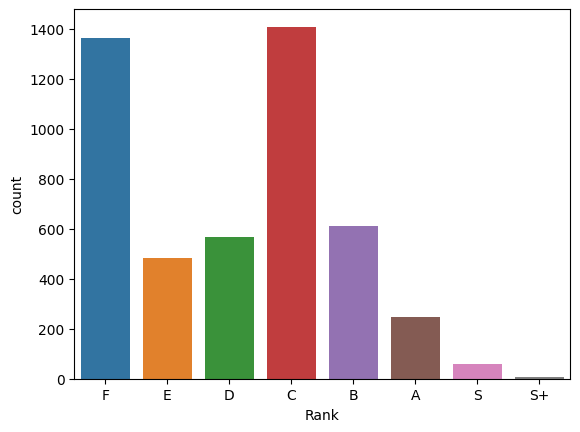

In [404]:
sns.countplot(x='Rank', data=df, order=tiers)

### Exploração 

##### Busca de correlações (Coeficientes de correlação)

In [405]:
# A correlação de Pearson é utilizada para identificar as colunas que possuem maior relação com a coluna em análise, neste caso 'Transistors (million)'.

In [406]:
colunas_para_calculo = df.describe().columns
print('Coeficiente de correlação de Pearson entre a coluna Die Size (mm^2) e:')

coor_dict = {}
r_list = []

for value in df.corr()['Die Size (mm^2)']:
    if value == 1:
        r = 'relação linear perfeita e positiva'
    elif value == 0:
        r = 'inexistência linear'
    elif value == -1:
        r = 'relação linear perfeita e negativa'
    elif value > 0:
        r = 'relação linear positiva'
    elif value < 0:
        r = 'relação linear negativa'

    r_list.append(r)

print(df.corr(method='pearson', min_periods=1)['Transistors (million)'], '\n')

count = 0
for col in colunas_para_calculo: 
    coor_dict[col] = r_list[count]
    print(f'{col}: {coor_dict[col]}')
    count += 1

Coeficiente de correlação de Pearson entre a coluna Die Size (mm^2) e:
index                    0.118857
Process Size (nm)       -0.383571
TDP (W)                  0.271506
Die Size (mm^2)          0.628414
Transistors (million)    1.000000
Freq (MHz)               0.015453
Name: Transistors (million), dtype: float64 

index: relação linear positiva
Process Size (nm): relação linear negativa
TDP (W): relação linear positiva
Die Size (mm^2): relação linear perfeita e positiva
Transistors (million): relação linear positiva
Freq (MHz): relação linear positiva


C:\Users\amr\AppData\Local\Temp\ipykernel_13856\939001549.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\amr\AppData\Local\Temp\ipykernel_13856\939001549.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Análise dos Dados

In [407]:
df_an = df.copy()
df_an.set_index('Release Date', inplace=True)
df_an.sort_index(inplace=True)

In [408]:
df_cpu = df_an[df_an["Type"] == "CPU"]
df_gpu = df_an[df_an["Type"] == "GPU"]

### Analise da quantidade dos Transistors vs Tamanho do Núcleo por Anos

#### CPU

In [409]:
fig_transistors = make_subplots()
fig_die = make_subplots()

# Add traces
fig_transistors.add_trace(
    go.Scatter(x= df_an.index, y=df_cpu["Transistors (million)"] ,name= "CPU")
)
# Add figure title
fig_transistors.update_layout(
    title_text="CPU vs Transistors (million) evolution over years"
)
# Set x-axis title
fig_transistors.update_xaxes(title_text="Years")
# Set y-axes titles
fig_transistors.update_yaxes(title_text="<b>Transistors (million)", secondary_y=False)

# Add traces
fig_die.add_trace(
    go.Scatter(x= df_an.index, y=df_cpu["Die Size (mm^2)"] ,name= "CPU")
)
# Add figure title
fig_die.update_layout(
    title_text="CPU vs Die Size (mm^2) evolution over years"
)
# Set x-axis title
fig_die.update_xaxes(title_text="Years")
# Set y-axes titles
fig_die.update_yaxes(title_text="<b>Die Size (mm^2)", secondary_y=False)

fig_transistors.show()
fig_die.show()

#### GPU

In [410]:
fig_transistors = make_subplots()
fig_die = make_subplots()

# Add traces
fig_transistors.add_trace(
    go.Scatter(x= df_an.index, y=df_gpu["Transistors (million)"] ,name= "GPU")
)
# Add figure title
fig_transistors.update_layout(
    title_text="GPU vs Transistors (million) evolution over years"
)
# Set x-axis title
fig_transistors.update_xaxes(title_text="Years")
# Set y-axes titles
fig_transistors.update_yaxes(title_text="<b>Transistors (million)", secondary_y=False)

# Add traces
fig_die.add_trace(
    go.Scatter(x= df_an.index, y=df_gpu["Die Size (mm^2)"] ,name= "GPU")
)
# Add figure title
fig_die.update_layout(
    title_text="GPU vs Die Size (mm^2) evolution over years"
)
# Set x-axis title
fig_die.update_xaxes(title_text="Years")
# Set y-axes titles
fig_die.update_yaxes(title_text="<b>Die Size (mm^2)", secondary_y=False)

fig_transistors.show()
fig_die.show()

##### Analise de Transistors x Die Size

#### Análise de frquência

In [411]:
fig = make_subplots()

# Add traces
fig.add_trace(
    go.Scatter(x= df_cpu.index, y=df_cpu["Freq (MHz)"] ,name= "CPU")
)

fig.add_trace(
    go.Scatter(x= df_gpu.index,y= df_gpu["Freq (MHz)"], name= "GPU")
)

# Add figure title
fig.update_layout(
    title_text="CPU/GPU vs Frequency (MHz) evolution over years"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Freq (MHz)</b>", secondary_y=False)

fig.show()

#### Analise Proccess Size

In [412]:
fig = make_subplots()

# Add traces
fig.add_trace(
    go.Scatter(x= df_cpu.index, y=df_cpu["Process Size (nm)"] ,name= "CPU")
)

fig.add_trace(
    go.Scatter(x= df_gpu.index,y= df_gpu["Process Size (nm)"], name= "GPU")
)

# Add figure title
fig.update_layout(
    title_text="CPU/GPU vs Process Size (nm) evolution over years"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Process Size (nm)</b>", secondary_y=False)

fig.show()

### Modelo

#### Divisão de conjuntos, treino e teste

In [413]:
def amostragem_estratificada(test_set):
    return (test_set['Rank'].value_counts() / len(test_set)) 

In [414]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(df, df['Rank']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [415]:
amostragem_estratificada(strat_train_set)

C     0.296628
F     0.287408
B     0.128556
D     0.119600
E     0.101686
A     0.051897
S     0.012645
S+    0.001581
Name: Rank, dtype: float64

In [416]:
amostragem_estratificada(strat_test_set)

C     0.297155
F     0.287671
B     0.128556
D     0.119073
E     0.101159
A     0.051633
S     0.012645
S+    0.002107
Name: Rank, dtype: float64

In [417]:
strat_train_set.drop(columns=['Rank'], inplace=True)
strat_test_set.drop(columns=['Rank'], inplace=True)

##### Padronização dos dados

In [418]:
num_attribs = list(df.describe(include=np.number))

In [419]:
padronizacao_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

##### Atributos categóricos

In [420]:
cat_attribs = ['Vendor']

##### Full Pipeline

In [ ]:
def f_pipe(num):
    full_pipeline = ColumnTransformer([
        ('num_attr', padronizacao_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs),
    ])

In [421]:
full_pipeline = ColumnTransformer([
        ('num_attr', padronizacao_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs),
    ])

In [431]:
strat_train_set

,index,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
2630,2683,NVIDIA Tesla C2070,GPU,2011-07-25,40.0,238.00000,529.000000,3100.000000,574.0,TSMC,NVIDIA
2291,2343,ATI Mobility Radeon X1600 Mac Edition,GPU,2007-11-08,90.0,97.80752,150.000000,157.000000,398.0,TSMC,ATI
3475,3543,NVIDIA GeForce GTX 1060 6 GB,GPU,2016-07-19,16.0,120.00000,200.000000,4400.000000,1506.0,TSMC,NVIDIA
1247,1265,Intel Core i3-4360,CPU,2014-05-01,22.0,54.00000,177.000000,1400.000000,3700.0,Intel,Intel
2436,2488,NVIDIA Quadro K600,GPU,2013-03-01,28.0,41.00000,118.000000,1270.000000,876.0,TSMC,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...
4688,4796,NVIDIA GeForce RTX 3070,GPU,2020-09-01,8.0,220.00000,392.000000,17400.000000,1500.0,Samsung,NVIDIA
469,475,AMD Opteron 842,CPU,2003-09-09,130.0,82.00000,193.000000,106.000000,1600.0,Unknown,AMD
805,812,AMD Phenom II X4 900e,CPU,2009-06-02,45.0,65.00000,258.000000,758.000000,2400.0,Unknown,AMD
503,509,AMD Ryzen 7 4700GE,CPU,2020-07-21,7.0,35.00000,189.488435,1959.104783,3100.0,TSMC,AMD


In [433]:
strat_train_set_prepared

array([[ 0.18931985, -0.32365076,  1.22519319, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05455057,  0.79974538, -0.00249562, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80616857, -0.86288091,  0.19184761, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.15268474, -0.21131114, -0.28979652, ...,  0.        ,
         0.        ,  0.        ],
       [-1.37001632, -1.06509221, -0.55251149, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65769452, -0.59326583, -0.50872566, ...,  0.        ,
         1.        ,  0.        ]])

In [422]:
strat_train_set_prepared = full_pipeline.fit_transform(strat_train_set)

In [423]:
strat_test_set_prepared = full_pipeline.fit_transform(strat_test_set)

# MODELOS

##### Treinamento do modelo - Regressão Linear

In [424]:
x = strat_train_set[['Transistors (million)']]
y = strat_train_set[['Die Size (mm^2)']]

lin_reg = LinearRegression().fit(x, y)

In [425]:
c_angular = lin_reg.coef_
c_linear = lin_reg.intercept_

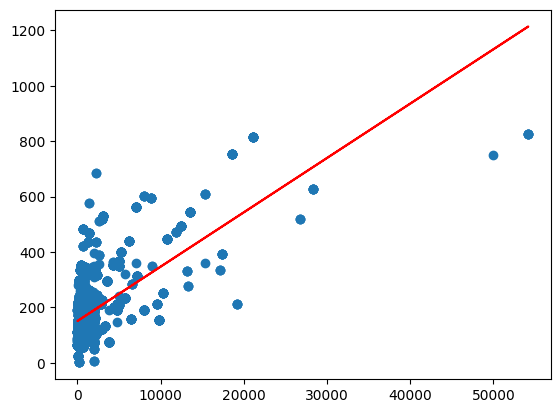

In [426]:
plt.scatter(x, y)
plt.plot(x, c_linear + c_angular * x, color='red')
plt.show()

In [430]:
cpu_labels = strat_train_set['Transistors (million)']



cpu = strat_train_set
#cpu = strat_train_set.drop('Transistors (million)', axis=1)
cpu_prepared = full_pipeline.fit_transform(cpu)

In [ ]:
lin_reg = LinearRegression().fit(cpu_prepared, cpu_labels)

cpu_predictions = lin_reg.predict(cpu_prepared)
lin_rmse = mean_squared_error(cpu_labels, cpu_predictions, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [2106, 3796]

In [ ]:
cpu_predictions

In [ ]:
round(lin_rmse, 2)

# 2.4 Requisitos da Construção dos Modelos e Aprendizado de Máquina 

### Seleção dos Modelos